In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190104/datetime_per_seed/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']
area_list = [str(i) for i in range(36)]

In [4]:
# # 2Dをdatetime型にする
# import datetime
# def create_datetime(seed, time):
#     time = time.apply(lambda x : int(x))
#     new_datetime = []
    
#     # row = ['time', 'area', 'people']
#     for row in np.asanyarray(time):
#         days = int(seed) - 100
#         hours = int(row / 3600)
#         base_date = '2019-01-{0} {1}:00:00'.format(days, hours)
#         tdatatime = datetime.datetime.strptime(base_date, '%Y-%m-%d %H:%M:%S')
#         new_datetime.append(tdatatime)

#     return pd.Series(new_datetime)

In [5]:
# csv_array = {}
# for _dir in dir_list:
#     csv_array[_dir] = {}
#     for _seed in seed_list:
#         csv_array[_dir][_seed] = {}
#         for _csv in csv_list:
#             csv_array[_dir][_seed][_csv] = {}
            
#             df = pd.read_csv(root_dir + _dir + 'seed' + _seed + '_' + _csv + '.csv',
#                                                 encoding='Shift_JISx0213')
#             df = df.groupby(['area'])
#             for _area, _group in df:
#                 _area = str(int(_area))
                
#                 _group.reset_index(drop=True, inplace=True)
#                 _group.loc[:, 'time'] = create_datetime(_seed, _group.loc[:, 'time'].copy())
#                 _group = _group.drop(['area'], axis=1)
                
#                 # dsとyを指定してくるので
#                 _group = _group.rename(columns={'time': 'ds', 'people': 'y'})
#                 _group['y'] = _group['y'].apply(lambda x: int(x))
#                 csv_array[_dir][_seed][_csv][_area] = _group

In [6]:
# seed_array = {}
# for _dir in dir_list:
#     seed_array[_dir] = {}
#     for _csv in csv_list:
#         seed_array[_dir][_csv] = {}
#         for _area in area_list:
            
#             tmp_seed = []
#             for _seed in seed_list:
#                 df = csv_array[_dir][_seed][_csv][_area].copy()
#                 tmp_seed.append(df)
                
#             tmp = pd.concat([df for df in tmp_seed])
#             tmp.sort_values(['ds'], inplace=True)
#             tmp.reset_index(drop=True, inplace=True)
# #             tmp.to_csv('/Users/kessapassa/OneDrive/research_log/20190104/datetime_per_seed/'+_dir + '_' + _csv + str(_area) + '.csv')
#             seed_array[_dir][_csv][_area] = tmp

In [7]:
seed_array = {}
for _dir in dir_list:
    seed_array[_dir] = {}
    for _csv in csv_list:
        seed_array[_dir][_csv] = {}
        for _area in area_list:
            df = pd.read_csv(root_dir + _dir +  '_' + _csv + _area + '.csv',
                                            encoding='Shift_JISx0213')
            seed_array[_dir][_csv][_area] = df

In [73]:
people = 'people30000'
csv = 'census'
area = '21'

In [74]:
loc_list = [str(i) for i in [14, 15, 21, 22, 27, 28, 33, 34]]

In [87]:
import warnings
warnings.filterwarnings('ignore')

success_array = []
failed_array = []
for _area in loc_list:
    try:
        df = seed_array[people][csv][_area].copy()
        ts = df['y']
        diff = ts - ts.shift()
        diff = diff.dropna()

        resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')
        p = resDiff['aic_min_order'][0]
        q = resDiff['aic_min_order'][1]

        model = sm.tsa.ARIMA(ts,order=(p,0,q))
        result = model.fit(dist=False)
        
#         print(_area)
#         show_evaluation(ts, result.predict(start=0, end=17))
    
        success_array.append(_area)
    except:
        failed_array.append(_area)
        

print('成功')
for i in success_array:
    print(i)
print('\n失敗')
for i in failed_array:
    print(i)

成功
22
34

失敗
14
15
21
27
28
33


# https://github.com/EnsekiTT/blog/blob/master/20171127_error/Error.ipynb

In [76]:
def show_evaluation(y, y_pred):
    AE = np.sum(np.abs(y-y_pred))
    print('AE', AE)
    MAE = np.mean(np.abs(y-y_pred))
    print('MAE', MAE)
    MAE = np.mean((y-y_pred)**2)
    print('MAE', MAE)
    MCE = np.mean(y != y_pred)
    print('MCE', MCE)
    RMSE = np.sqrt(np.mean((y-y_pred)**2))
    print('RMSE', RMSE)
    RMSPE = (np.mean(((y-y_pred)/y)**2))*100
    print('RMSPE', RMSPE)
    RMSLE = np.sqrt(np.mean((np.log(y+1) - np.log(y_pred+1))**2))
    print('RMSLE', RMSLE)

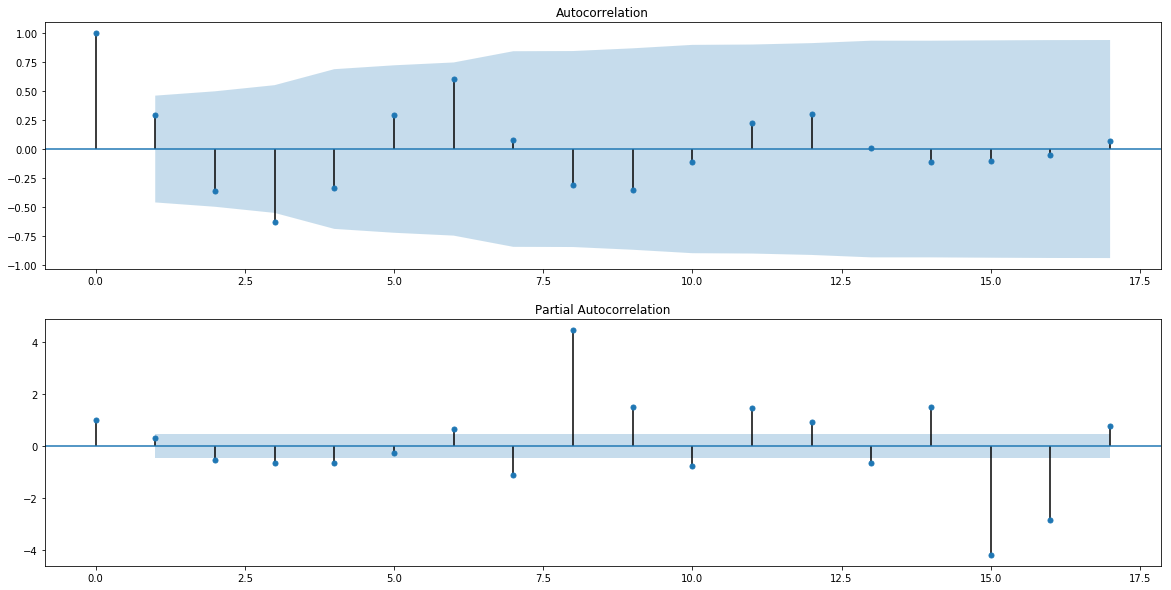

In [77]:
import statsmodels.api as sm

df = seed_array[people][csv][area].copy()
ts = df['y']
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
fig = sm.graphics.tsa.plot_acf(ts, ax=ax1)
fig = sm.graphics.tsa.plot_pacf(ts, ax=ax2)

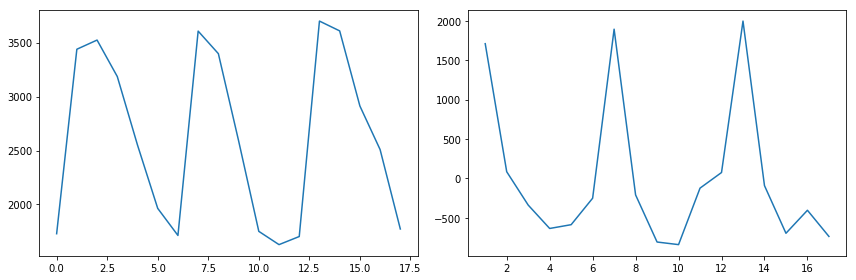

In [78]:
fig = plt.figure(figsize=(12, 4))

# 元のデータ
ax1 = fig.add_subplot(121)
plt.plot(ts)

# 階差のデータ
ax2 = fig.add_subplot(122)
diff = ts - ts.shift()
diff = diff.dropna()
plt.plot(diff)

plt.tight_layout() # グラフ間スキマ調整

(4, 2)


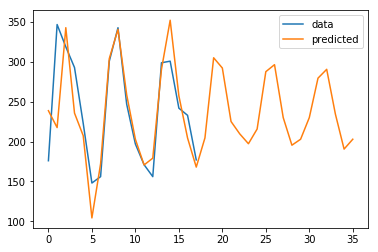

AE 508.1252701258346
MAE 28.22918167365748
MAE 1751.3011879470607
MCE 1.0
RMSE 41.84855060748294
RMSPE 2.724002544996752
RMSLE 0.17753964967011077


In [86]:
resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')
p = resDiff['aic_min_order'][0]
q = resDiff['aic_min_order'][1]
print(resDiff['aic_min_order'])
model = sm.tsa.ARIMA(ts,order=(p,0,q))
result = model.fit(dist=False)

fig = plt.figure()
plt.clf()
plt.plot(ts)
plt.plot(result.predict(start=0,end=35))
plt.legend(['data','predicted'])
plt.show()

show_evaluation(ts, result.predict(start=0, end=17))